In [1]:
import tensorflow as tf

In [2]:
import cv2

In [3]:
import numpy as np

In [4]:
import keras

In [5]:
import os

In [6]:
features = []
target = []
for x in list(range(0,43)):
    ImageNamesList = os.listdir("D:/inmovidu_AI/TrafficData/myData" + "/" + str(x))
    for y in ImageNamesList:
        img = cv2.imread("D:/inmovidu_AI/TrafficData/myData" + "/" + str(x) + "/" + y)
        features.append(img)
        target.append(x)
    print("Loading Data In Folder",x)

Loading Data In Folder 0
Loading Data In Folder 1
Loading Data In Folder 2
Loading Data In Folder 3
Loading Data In Folder 4
Loading Data In Folder 5
Loading Data In Folder 6
Loading Data In Folder 7
Loading Data In Folder 8
Loading Data In Folder 9
Loading Data In Folder 10
Loading Data In Folder 11
Loading Data In Folder 12
Loading Data In Folder 13
Loading Data In Folder 14
Loading Data In Folder 15
Loading Data In Folder 16
Loading Data In Folder 17
Loading Data In Folder 18
Loading Data In Folder 19
Loading Data In Folder 20
Loading Data In Folder 21
Loading Data In Folder 22
Loading Data In Folder 23
Loading Data In Folder 24
Loading Data In Folder 25
Loading Data In Folder 26
Loading Data In Folder 27
Loading Data In Folder 28
Loading Data In Folder 29
Loading Data In Folder 30
Loading Data In Folder 31
Loading Data In Folder 32
Loading Data In Folder 33
Loading Data In Folder 34
Loading Data In Folder 35
Loading Data In Folder 36
Loading Data In Folder 37
Loading Data In Folder

In [7]:
type(features)

list

In [8]:
type(target)

list

In [9]:
features = np.array(features)

In [10]:
target = np.array(target)

In [11]:
type(features)

numpy.ndarray

In [12]:
type(target)

numpy.ndarray

In [13]:
features.shape

(34790, 32, 32, 3)

In [14]:
target.shape

(34790,)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_features,test_features,train_targets,test_targets = train_test_split(features,target,test_size = 0.2)

In [17]:
def preprocessing(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image/255
    return image

In [18]:
train_features = np.array(list(map(preprocessing,train_features)))

In [19]:
test_features = np.array(list(map(preprocessing,test_features)))

In [20]:
train_features.shape

(27832, 32, 32)

In [21]:
train_features = train_features.reshape(27832,32,32,1)

In [22]:
train_features.shape

(27832, 32, 32, 1)

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
dataGen = ImageDataGenerator(rotation_range = 10,height_shift_range = 0.1,width_shift_range = 0.1,shear_range = 0.1,zoom_range = 0.2)

In [25]:
dataGen.fit(train_features)

In [26]:
batches = dataGen.flow(train_features,train_targets,batch_size = 20)

In [27]:
len(batches)

1392

In [28]:
images,labels = next(batches)

In [29]:
images.shape

(20, 32, 32, 1)

In [30]:
images = images.reshape(20,32,32)

In [31]:
import matplotlib.pyplot as plt

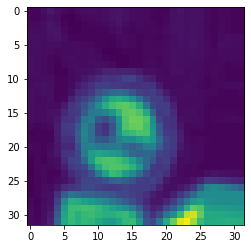

In [32]:
plt.imshow(images[0])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

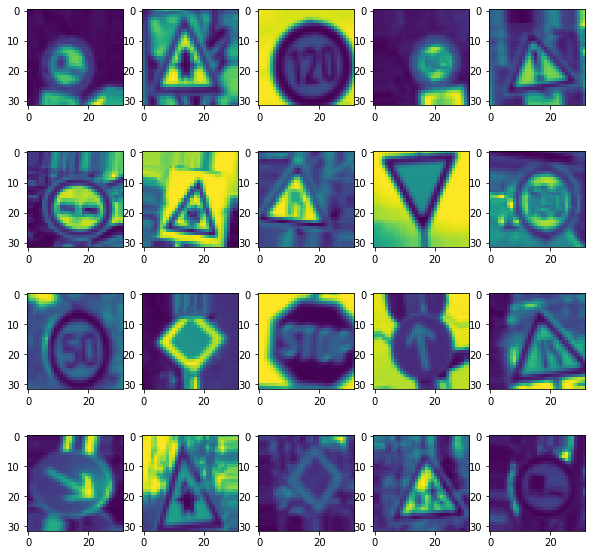

In [33]:
plt.figure(figsize = (10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i])
plt.show

In [34]:
from tensorflow.keras.utils import to_categorical

In [35]:
train_targets = to_categorical(train_targets)

In [36]:
train_targets.shape

(27832, 43)

In [37]:
train_features.shape

(27832, 32, 32, 1)

# Step-1 Specifying The Architecture

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [39]:
model = Sequential()
model.add(Conv2D(60,(3,3),activation = "relu",input_shape = (32,32,1)))

model.add(Conv2D(60,(3,3),activation = "relu"))

model.add(MaxPooling2D((2,2)))
          
model.add(Conv2D(30,(3,3),activation = "relu"))

model.add(Conv2D(30,(3,3),activation = "relu"))

model.add(Conv2D(30,(3,3),activation = "relu"))

model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500,activation = "relu"))

model.add(Dense(43,activation = "softmax"))

# Step:2 Compiling The Model

In [40]:
from tensorflow.keras.optimizers import Adam

In [41]:
model.compile(Adam(learning_rate = 0.001),loss = "categorical_crossentropy",metrics = ["accuracy"])

# step:3 Train The Model

In [42]:
#generate new images combine with original images train on the combined images

In [43]:
model.fit_generator(dataGen.flow(train_features,train_targets,batch_size = 20),epochs = 20)

C:\Users\Sai Varshith\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1392/1392 [==============================] - 44s 31ms/step - loss: 2.0682 - accuracy: 0.4155
Epoch 2/20
1392/1392 [==============================] - 42s 30ms/step - loss: 0.7005 - accuracy: 0.7866
Epoch 3/20
1392/1392 [==============================] - 46s 33ms/step - loss: 0.4341 - accuracy: 0.8666
Epoch 4/20
1392/1392 [==============================] - 41s 29ms/step - loss: 0.3264 - accuracy: 0.8986
Epoch 5/20
1392/1392 [==============================] - 44s 32ms/step - loss: 0.2527 - accuracy: 0.9222
Epoch 6/20
1392/1392 [==============================] - 49s 35ms/step - loss: 0.2229 - accuracy: 0.9329
Epoch 7/20
1392/1392 [==============================] - 45s 32ms/step - loss: 0.1900 - accuracy: 0.9403
Epoch 8/20
1392/1392 [==============================] - 41s 29ms/step - loss: 0.1765 - accuracy: 0.9449
Epoch 9/20
1392/1392 [==============================] - 41s 29ms/step - loss: 0.1641 - accuracy: 0.9507
Epoch 10/20
1392/1392 [==============================] - 41s 30m

In [44]:
ModelInJson = model.to_json()

In [45]:
abc = open("D:/Datasets/inmovidu_AI_Traffic.json","w")
abc.write(ModelInJson)
abc.close()

In [46]:
model.save_weights("D:/Datasets/inmovidu_AI_Trafficweights.h5")

In [47]:
from keras.models import model_from_json

In [48]:
abc = open("D:/Datasets/inmovidu_AI_Traffic.json","r")
loaded_data = abc.read()
loaded_model = model_from_json(loaded_data)
loaded_model.load_weights("D:/Datasets/inmovidu_AI_Trafficweights.h5")

# Step:4 Testing The Model By Using It For Predictions

In [49]:
capt = cv2.VideoCapture(0)


In [50]:
def preprocessing(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image/255
    return image

In [51]:
def getClassName(classNo):
    if classNo == 0: return 'Speed Limit 20km/hr'
    elif classNo == 1: return 'Speed Limit 30km/hr'
    elif classNo == 2: return 'Speed Limit 50km/hr'
    elif classNo == 3: return 'Speed Limit 60km/hr'
    elif classNo == 4: return 'Speed Limit 70km/hr'
    elif classNo == 5: return 'Speed Limit 80km/hr'
    elif classNo == 6: return 'End of Speed Limit of 80km/hr'
    elif classNo == 7: return 'Speed Limit 100km/hr'
    elif classNo == 8: return 'Speed Limit 120km/hr'
    elif classNo == 9: return 'No Passing'
    elif classNo == 10: return 'No Passing for vehicles over 3.5 metric tons'
    elif classNo == 11: return 'Right of way at the next intersection'
    elif classNo == 12: return 'PriorityRoad'
    elif classNo == 13: return 'yeild'
    elif classNo == 14: return 'stop'
    elif classNo == 15: return 'No Vehciles'
    elif classNo == 16: return 'Vehciles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No Entry'
    elif classNo == 18: return 'General Caution'
    elif classNo == 19: return 'Dangerous Curve To The Left'
    elif classNo == 20: return 'Dangerous Curve To The Right'
    elif classNo == 21: return 'Double Curve'
    elif classNo == 22: return 'Bumpy Road'
    elif classNo == 23: return 'Slippery Road'
    elif classNo == 24: return 'Road Narrows On The Right'
    elif classNo == 25: return 'Road Work'
    elif classNo == 26: return 'Traffic Signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children Crossing'
    elif classNo == 29: return 'Bicycle Crossing'
    elif classNo == 30: return 'beware of Ice/snow'
    elif classNo == 31: return 'Wild Animals Crossing'
    elif classNo == 32: return 'End Of all speed And Passing Limits'
    elif classNo == 33: return 'Turn Right a head'
    elif classNo == 34: return 'Turn Left A Head'
    elif classNo == 35: return 'ahead only'
    elif classNo == 36: return 'Go Straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'KeepRight'
    elif classNo == 39: return 'KeepLeft'
    elif classNo == 40: return 'RoundAbout Mandatory'
    elif classNo == 41: return 'End Of No Passing'
    elif classNo == 42: return 'End Of No Passing by vehcles over 3.5 metric tons'
    


In [ ]:
while True:
    success,image = capt.read()
    imagearr=np.asarray(image)
    imagearr = cv2.resize(imagearr,(32,32))
    imagearr = preprocessing(imagearr)
    imagearr = imagearr.reshape(1,32,32,1)
    predictions = loaded_model.predict(imagearr)
    neuronindex = loaded_model.predict_classes(imagearr)
    cv2.putText(image,"Class:",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(image,"Probability:",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    MaxProbabilityValue = np.amax(predictions)
    if MaxProbabilityValue>0.75:
        cv2.putText(image,getClassName(neuronindex),(120,35),cv2.FONT_HERSHEY_COMPLEX,1,(200,100,30),2)
        cv2.putText(image,str(MaxProbabilityValue*100) + "%",(170,75),cv2.FONT_HERSHEY_COMPLEX,1,(200,100,30),2)
    cv2.imshow("ModelPrediction",image)
    AsciiValue = cv2.waitKey(1)
    if AsciiValue == ord('q'):
        cv2.destroyAllWindows()
        break
        
    

C:\Users\Sai Varshith\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
